In [12]:
import numpy as np
rnd_gen = np.random.default_rng(2024)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from classifiers import ConformalNearestNeighbours
from copy import deepcopy
from sklearn.datasets import make_classification

# Example from day 1

In [13]:
X = np.array([3, -2, -1, 1, 2]).reshape(-1,1)
Y = np.array([1, -1, -1, 1, 1])

In [14]:
cp = ConformalNearestNeighbours(k=1)

In [15]:
i = 0
Gamma, p_values = cp.predict(X[i], Y[i], return_p_values=True)
cp.learn_one(X[i], Y[i])
p_values
d_same, d_other = cp._find_nearest_distances(cp.D, cp.y)

true_label = Y[i]
print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')

false_array = deepcopy(cp.y)
false_array[-1] = -true_label
d_same, d_other = cp._find_nearest_distances(cp.D, false_array)

print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')

print(f'p-values: {p_values}')

NC scores for true hypothesis y=1: [nan]
NC scores for false hypothesis y=-1: [nan]
p-values: {-1: 0.21432320123825765, 1: 0.3094520308816917}


/tmp/ipykernel_3752344/1325023172.py:8: RuntimeWarning: invalid value encountered in divide
  print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')
/tmp/ipykernel_3752344/1325023172.py:14: RuntimeWarning: invalid value encountered in divide
  print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')


In [16]:
i = 1
Gamma, p_values = cp.predict(X[i], Y[i], return_p_values=True)
cp.learn_one(X[i], Y[i])
p_values
d_same, d_other = cp._find_nearest_distances(cp.D, cp.y)

true_label = Y[i]
print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')

false_array = deepcopy(cp.y)
false_array[-1] = -true_label
d_same, d_other = cp._find_nearest_distances(cp.D, false_array)

print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')

print(f'p-values: {p_values}')

NC scores for true hypothesis y=-1: [inf inf]
NC scores for false hypothesis y=1: [0. 0.]
p-values: {-1: 0.7994660967748332, 1: 0.7994660967748332}


In [17]:
i = 2
Gamma, p_values = cp.predict(X[i], Y[i], return_p_values=True)
cp.learn_one(X[i], Y[i])
p_values
d_same, d_other = cp._find_nearest_distances(cp.D, cp.y)

true_label = Y[i]
print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')

false_array = deepcopy(cp.y)
false_array[-1] = -true_label
d_same, d_other = cp._find_nearest_distances(cp.D, false_array)

print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')

print(f'p-values: {p_values}')

NC scores for true hypothesis y=-1: [ inf 0.2  0.25]
NC scores for false hypothesis y=1: [0.8 inf 4. ]
p-values: {-1: 0.6652673662884889, 1: 0.6652673662884889}


In [18]:
i = 3
Gamma, p_values = cp.predict(X[i], Y[i], return_p_values=True)
cp.learn_one(X[i], Y[i])
p_values
d_same, d_other = cp._find_nearest_distances(cp.D, cp.y)

true_label = Y[i]
print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')

false_array = deepcopy(cp.y)
false_array[-1] = -true_label
d_same, d_other = cp._find_nearest_distances(cp.D, false_array)

print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')

print(f'p-values: {p_values}')

NC scores for true hypothesis y=1: [0.5        0.33333333 0.5        1.        ]
NC scores for false hypothesis y=-1: [ inf 0.2  0.25 1.  ]
p-values: {-1: 0.2855579538200129, 1: 0.03555795382001295}


In [19]:
i = 4
Gamma, p_values = cp.predict(X[i], Y[i], return_p_values=True)
cp.learn_one(X[i], Y[i])
p_values
d_same, d_other = cp._find_nearest_distances(cp.D, cp.y)

true_label = Y[i]
print(f'NC scores for true hypothesis y={true_label}: {d_same / d_other}')

false_array = deepcopy(cp.y)
false_array[-1] = -true_label
d_same, d_other = cp._find_nearest_distances(cp.D, false_array)

print(f'NC scores for false hypothesis y={-true_label}: {d_same / d_other}')

print(f'p-values: {p_values}')

NC scores for true hypothesis y=1: [0.25       0.33333333 0.5        0.5        0.33333333]
NC scores for false hypothesis y=-1: [2.         0.33333333 0.5        2.         3.        ]
p-values: {-1: 0.015745106752399797, 1: 0.4314902135047996}


Note to me: It would have been nice to get the p-values on the form given by Ilia, e.g. $\frac{2+2\tau_5}{5}$, and then they could be evaluated by drawing a uniform random number.

# Larger example

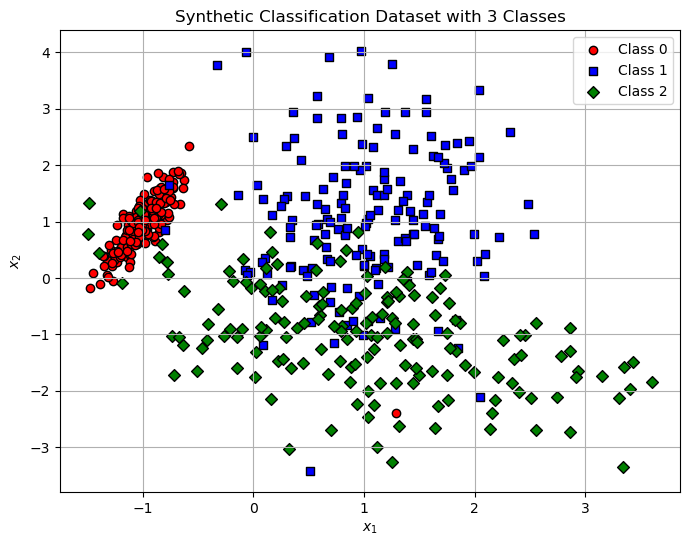

In [20]:
N = 500

X, Y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0, 
                           n_classes=3, n_clusters_per_class=1, random_state=2024)


# Create a scatter plot with different symbols for each class
plt.figure(figsize=(8, 6))

# Define different markers for each class
markers = ['o', 's', 'D']
colors = ['red', 'blue', 'green']

# Plot each class with a different marker
for label, marker, color in zip(np.unique(Y), markers, colors):
    plt.scatter(X[Y == label, 0], X[Y == label, 1], label=f'Class {label}', marker=marker, color=color, edgecolor='k')

# Add labels and a legend
plt.title('Synthetic Classification Dataset with 3 Classes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.show()

Online prediction using one nearest neighbours

In [21]:
epsilon = 0.1
k = 1
cp = ConformalNearestNeighbours(k=k, label_space=np.unique(Y))
for i, (object, label) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0], desc='Running online conformal prediction'):

    # Reality outputs object
    x = object

    # Forecaster outputs prediction set
    Gamma, p_values = cp.predict(x, epsilon=epsilon, return_p_values=True)

    # Reality outputs label
    y = label

    # Check error
    cp.err(Gamma, label)

    # Learn the label
    cp.learn_one(object, y)
    
    # Prefferred efficiency criteria

    # Observed excess
    cp.oe(Gamma, y)

    # Observed fuzziness
    cp.of(p_values, y)

print(f'Neighbours: {k}')
print(f'Average error: {cp.Err/Y.shape[0]}')
print(f'Average observed excess: {cp.OE/Y.shape[0]}')
print(f'Average observed fuzziness: {cp.OF/Y.shape[0]}')

Running online conformal prediction:   0%|          | 0/500 [00:00<?, ?it/s]

Neighbours: 1
Average error: 0.104
Average observed excess: 0.324
Average observed fuzziness: 0.12601178913900468


And 5 nearest neighbours

In [22]:
epsilon = 0.1
k = 3
cp = ConformalNearestNeighbours(k=k, label_space=np.unique(Y))
for i, (object, label) in tqdm(enumerate(zip(X, Y)), total=Y.shape[0], desc='Running online conformal prediction'):

    # Reality outputs object
    x = object

    # Forecaster outputs prediction set
    Gamma, p_values = cp.predict(x, epsilon=epsilon, return_p_values=True)

    # Reality outputs label
    y = label

    # Check error
    cp.err(Gamma, label)

    # Learn the label
    cp.learn_one(object, y)
    
    # Prefferred efficiency criteria

    # Observed excess
    cp.oe(Gamma, y)

    # Observed fuzziness
    cp.of(p_values, y)

print(f'Neighbours: {k}')
print(f'Average error: {cp.Err/Y.shape[0]}')
print(f'Average observed excess: {cp.OE/Y.shape[0]}')
print(f'Average observed fuzziness: {cp.OF/Y.shape[0]}')

Running online conformal prediction:   0%|          | 0/500 [00:00<?, ?it/s]

Neighbours: 3
Average error: 0.1
Average observed excess: 0.238
Average observed fuzziness: 0.08955868638002344
